In [9]:
!pip install faker tqdm gensim scikit-learn matplotlib


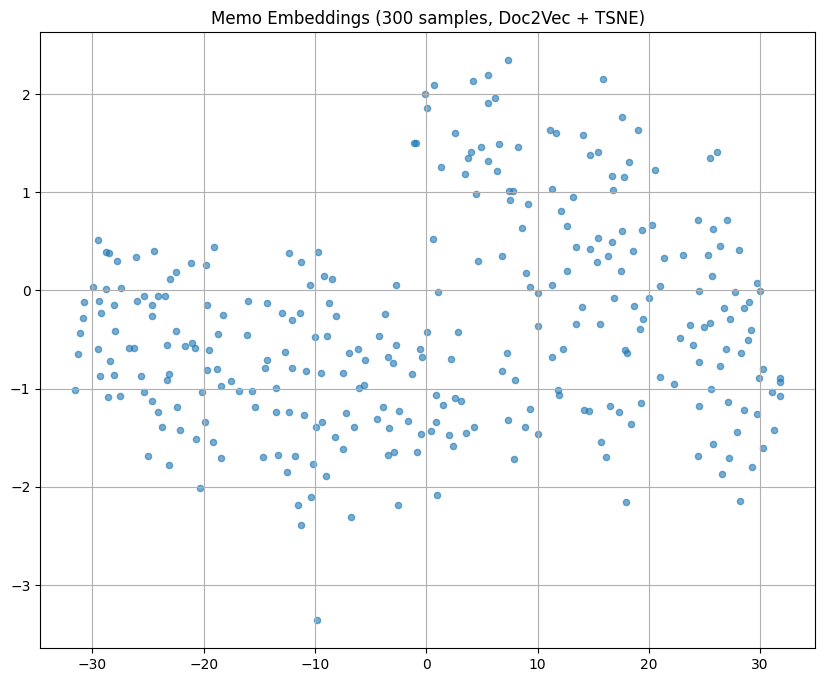

In [8]:
from faker import Faker
import random
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm

# 1. 텍스트 전처리 - 토큰화
def simple_tokenize(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text.lower())
    tokens = text.split()
    return [token for token in tokens if len(token) > 1]

# 2. 더미 메모 생성 (한글 + 영어)
fake = Faker(['ko_KR', 'en_US'])

memos = []
for i in range(300):
    lang = random.choice(['ko', 'en'])
    if lang == 'ko':
        content = fake.text(max_nb_chars=100)
    else:
        content = fake.sentence(nb_words=15)
    memos.append({"id": str(i), "content": content})

# 3. TaggedDocument로 변환
documents = [
    TaggedDocument(words=simple_tokenize(m["content"]), tags=[m["id"]])
    for m in memos
]

# 4. Doc2Vec 학습
model = Doc2Vec(vector_size=50, window=5, min_count=2, workers=4, epochs=40)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

# 5. 벡터 추출
vectors = np.array([model.dv[m["id"]] for m in memos])

# 6. TSNE 차원 축소
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
coords = tsne.fit_transform(vectors)

# 7. 시각화
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.6, s=20)
plt.title("Memo Embeddings (300 samples, Doc2Vec + TSNE)")
plt.grid(True)
plt.show()
